In [41]:
# 1. Project Introduction
## Goal: Analyse employee data to uncover insights such as Employee demographics (age, gender, city), work experience and leave patterns.

In [43]:
# 2. Data exploration

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

mytable= pd.read_csv('../data/employee_data.csv')

## Preview Dataset

mytable.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [45]:
## Check data info
mytable.info()

## Checking basic statistics
mytable.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [47]:
# 3. Data Cleaning

## Check for missing data

for col in mytable.columns:
    percent_missing = np.mean(mytable[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

Education - 0%
JoiningYear - 0%
City - 0%
PaymentTier - 0%
Age - 0%
Gender - 0%
EverBenched - 0%
ExperienceInCurrentDomain - 0%
LeaveOrNot - 0%


In [49]:
## Drop Null values

mytable = mytable.dropna()

In [51]:
## Swap the type of info on 'leaveOrNot' from 0,1 to no,yes

mytable['LeaveOrNot'] = mytable['LeaveOrNot'].map({1 :'Yes', 0 :'No'})
mytable.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,No
1,Bachelors,2013,Pune,1,28,Female,No,3,Yes
2,Bachelors,2014,New Delhi,3,38,Female,No,2,No
3,Masters,2016,Bangalore,3,27,Male,No,5,Yes
4,Masters,2017,Pune,3,24,Male,Yes,2,Yes


In [53]:
## Drop Duplicates

mytable.drop_duplicates()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,No
1,Bachelors,2013,Pune,1,28,Female,No,3,Yes
2,Bachelors,2014,New Delhi,3,38,Female,No,2,No
3,Masters,2016,Bangalore,3,27,Male,No,5,Yes
4,Masters,2017,Pune,3,24,Male,Yes,2,Yes
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,No
4647,Bachelors,2016,Pune,3,30,Male,No,2,No
4649,Masters,2013,Pune,2,37,Male,No,2,Yes
4650,Masters,2018,New Delhi,3,27,Male,No,5,Yes


In [55]:
## Making sure Gender and City have consistent formatting

mytable['Gender'] = mytable['Gender'].str.capitalize()
mytable['City'] = mytable['City'].str.capitalize()
print(mytable['Gender'])
print(mytable['City'])

0         Male
1       Female
2       Female
3         Male
4         Male
         ...  
4648    Female
4649      Male
4650      Male
4651      Male
4652      Male
Name: Gender, Length: 4653, dtype: object
0       Bangalore
1            Pune
2       New delhi
3       Bangalore
4            Pune
          ...    
4648    Bangalore
4649         Pune
4650    New delhi
4651    Bangalore
4652    Bangalore
Name: City, Length: 4653, dtype: object


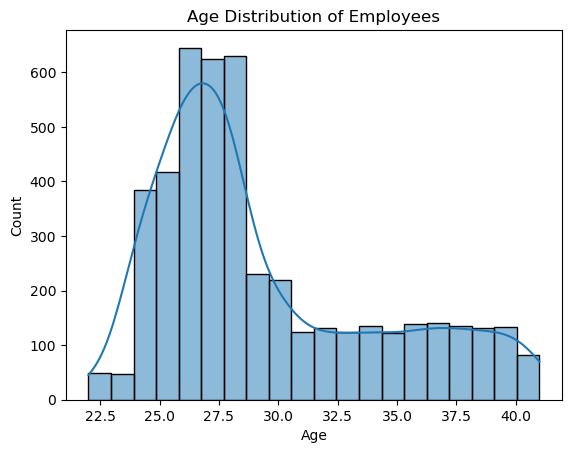

In [57]:
# 4. Data Analysis

## Age distribuition

sns.histplot(mytable['Age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.show()

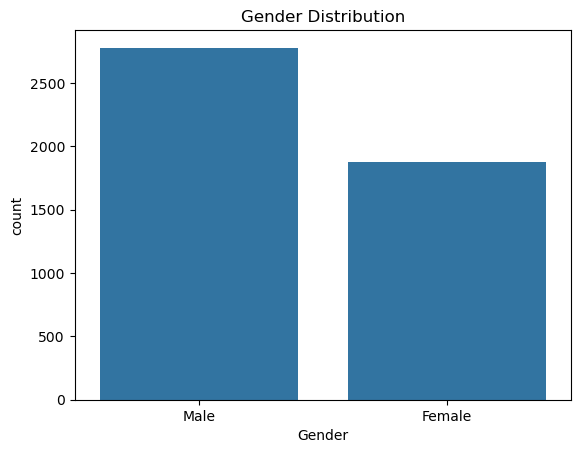

In [59]:
## Gender distribuition

sns.countplot(x='Gender', data=mytable)
plt.title('Gender Distribution')
plt.show()

Education
Bachelors    2.753124
PHD          2.731844
Masters      2.465063
Name: PaymentTier, dtype: float64


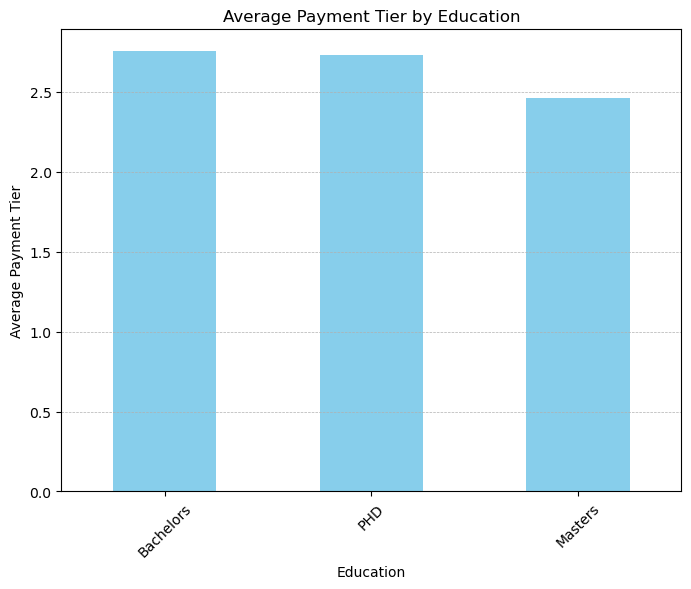

In [61]:
## Average payment tier per education level (Float)

avg_PTier = mytable.groupby('Education')['PaymentTier'].mean().sort_values(ascending=False)
print(avg_PTier)


#create graph

plt.figure(figsize=(8, 6))
avg_PTier.plot(kind='bar', color='skyblue')

plt.title('Average Payment Tier by Education')
plt.xlabel('Education')
plt.ylabel('Average Payment Tier')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

Education
Bachelors    2
PHD          2
Masters      2
Name: PaymentTier, dtype: int32


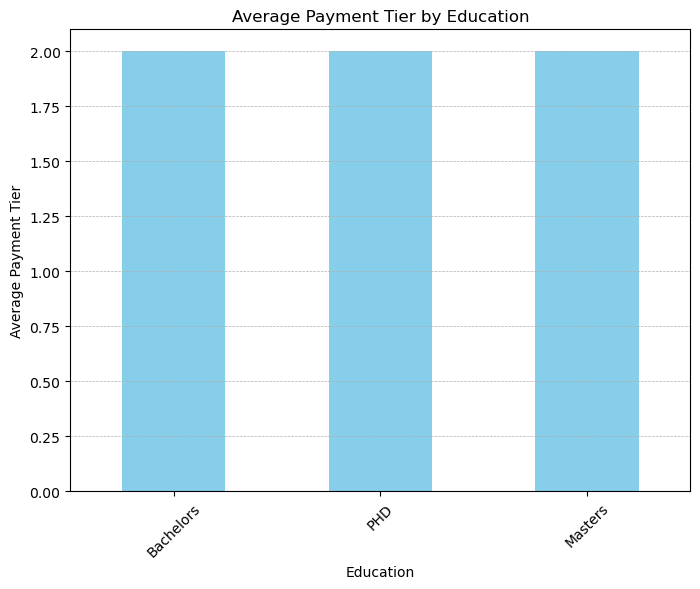

In [63]:
## Average payment tier per education level (int)

avg_PTier_int = mytable.groupby('Education')['PaymentTier'].mean().sort_values(ascending=False).astype(int)
print(avg_PTier_int)

#create graph

plt.figure(figsize=(8, 6))
avg_PTier_int.plot(kind='bar', color='skyblue')

plt.title('Average Payment Tier by Education')
plt.xlabel('Education')
plt.ylabel('Average Payment Tier')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

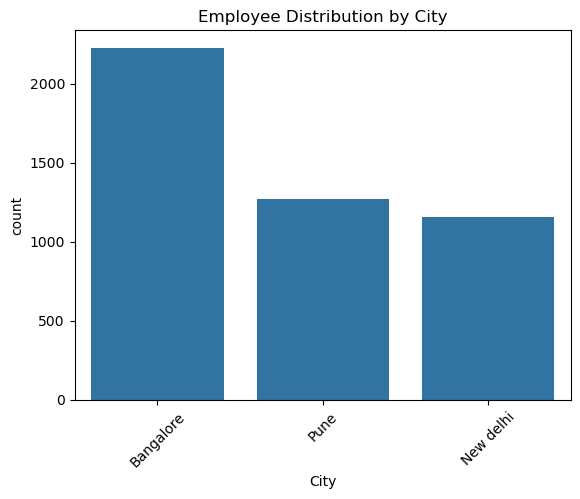

In [65]:
## Count employees per City 

sns.countplot(x='City', data=mytable)
plt.title('Employee Distribution by City')
plt.xticks(rotation=45)
plt.show()

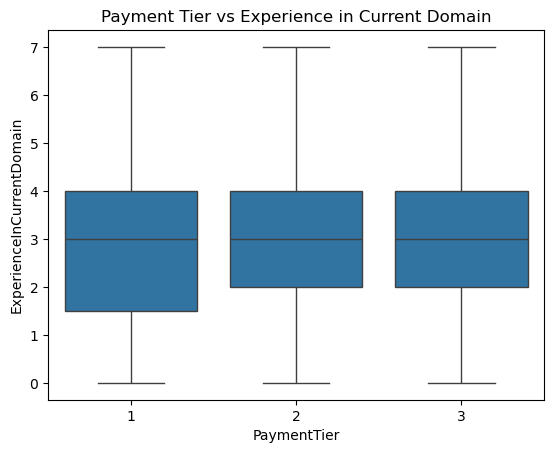

In [67]:
## PaymentTier vs. ExperienceInCurrentDomain

sns.boxplot(x='PaymentTier', y='ExperienceInCurrentDomain', data=mytable)
plt.title('Payment Tier vs Experience in Current Domain')
plt.show()

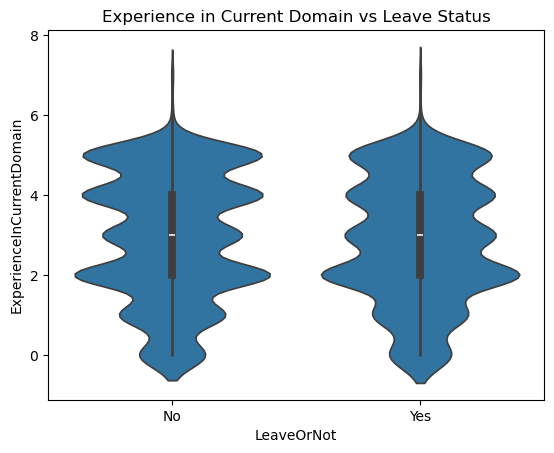

In [69]:
## Experience vs Leave status

sns.violinplot(x='LeaveOrNot', y='ExperienceInCurrentDomain', data=mytable)
plt.title('Experience in Current Domain vs Leave Status')
plt.show()

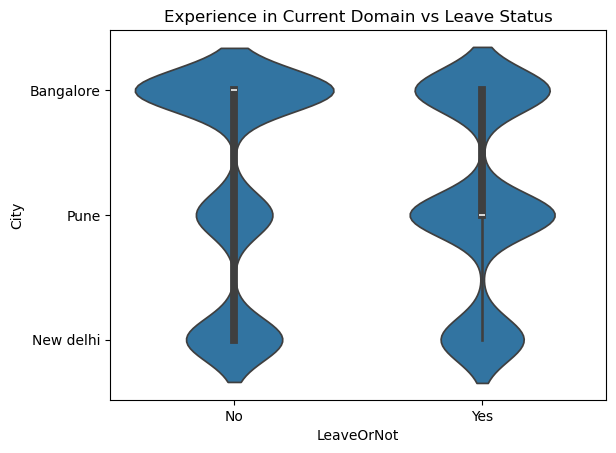

In [71]:
## Age vs Leave status

sns.violinplot(x='LeaveOrNot', y='City', data=mytable)
plt.title('Experience in Current Domain vs Leave Status')
plt.show()

In [75]:
# 5. Conclusions

## The majority of employees are male and are roughly 25 to 30 years old
## There are more Employees from Bangalore than from any other city
## Employees with higher experience in current domain are paid more, although it seems employees with Masters Degree’s are paid less 
## Employees with less experience in current domain are more likely to take leave
## Employees from Pune are more likely to take leave whereas employees from bangalore are less likely to take leave.